In [1]:
from __future__ import division, print_function, absolute_import

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Import MINST data
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets(".", one_hot=True)

Extracting ./train-images-idx3-ubyte.gz
Extracting ./train-labels-idx1-ubyte.gz
Extracting ./t10k-images-idx3-ubyte.gz
Extracting ./t10k-labels-idx1-ubyte.gz


In [13]:
learning_rate = 0.01
training_epochs = 100
batch_size = 256
display_step = 1
examples_to_show = 10

n_input = 784
n_hidden_1 = 256
n_hidden_2 = 128

X = tf.placeholder("float", [None, n_input])

weights = {
    'encoder_h1': tf.Variable(tf.random_normal([n_input, n_hidden_1])),
    'encoder_h2': tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2])),
    'decoder_h1': tf.Variable(tf.random_normal([n_hidden_2, n_hidden_1])),
    'decoder_h2': tf.Variable(tf.random_normal([n_hidden_1, n_input])),
}
biases = {
    'encoder_b1': tf.Variable(tf.random_normal([n_hidden_1])),
    'encoder_b2': tf.Variable(tf.random_normal([n_hidden_2])),
    'decoder_b1': tf.Variable(tf.random_normal([n_hidden_1])),
    'decoder_b2': tf.Variable(tf.random_normal([n_input])),
}

In [14]:
def encoder(x):
    layer_1 = tf.nn.sigmoid(tf.add(tf.matmul(x, weights['encoder_h1']), biases['encoder_b1']))
    layer_2 = tf.nn.sigmoid(tf.add(tf.matmul(layer_1, weights['encoder_h2']), biases['encoder_b2']))
    return layer_2

In [15]:
def decoder(x):
    layer_1 = tf.nn.sigmoid(tf.add(tf.matmul(x, weights['decoder_h1']), biases['decoder_b1']))
    layer_2 = tf.nn.sigmoid(tf.add(tf.matmul(layer_1, weights['decoder_h2']), biases['decoder_b2']))
    return layer_2

In [16]:
encoder_op = encoder(X)
decoder_op = decoder(encoder_op)

y_pred = decoder_op
y_true = X

cost = tf.reduce_mean(tf.pow(y_true - y_pred, 2))
optimizer = tf.train.RMSPropOptimizer(learning_rate).minimize(cost)

init = tf.global_variables_initializer()

In [17]:
sess = tf.InteractiveSession()
sess.run(init)

total_batch = int(mnist.train.num_examples / batch_size)

for epoch in range(training_epochs):
    for i in range(total_batch):
        
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        _, c = sess.run([optimizer, cost], feed_dict= {X: batch_xs})
        
        if epoch % display_step == 0:
            print("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(c))
            
print("Optimization Finised!")

Epoch: 0001 cost= 0.433295190
Epoch: 0001 cost= 0.433403671
Epoch: 0001 cost= 0.434225053
Epoch: 0001 cost= 0.433735758
Epoch: 0001 cost= 0.434026659
Epoch: 0001 cost= 0.432721704
Epoch: 0001 cost= 0.433761120
Epoch: 0001 cost= 0.434326828
Epoch: 0001 cost= 0.434597194
Epoch: 0001 cost= 0.434307039
Epoch: 0001 cost= 0.433340847
Epoch: 0001 cost= 0.434515506
Epoch: 0001 cost= 0.434130043
Epoch: 0001 cost= 0.432941586
Epoch: 0001 cost= 0.433672309
Epoch: 0001 cost= 0.433902889
Epoch: 0001 cost= 0.433890879
Epoch: 0001 cost= 0.432674348
Epoch: 0001 cost= 0.434084296
Epoch: 0001 cost= 0.433737367
Epoch: 0001 cost= 0.435319513
Epoch: 0001 cost= 0.434386879
Epoch: 0001 cost= 0.433580458
Epoch: 0001 cost= 0.433542341
Epoch: 0001 cost= 0.433432341
Epoch: 0001 cost= 0.434692949
Epoch: 0001 cost= 0.435140669
Epoch: 0001 cost= 0.433746934
Epoch: 0001 cost= 0.433893144
Epoch: 0001 cost= 0.434424311
Epoch: 0001 cost= 0.434007347
Epoch: 0001 cost= 0.432638615
Epoch: 0001 cost= 0.433180422
Epoch: 000

Epoch: 0002 cost= 0.172515988
Epoch: 0002 cost= 0.172074720
Epoch: 0002 cost= 0.173252583
Epoch: 0002 cost= 0.174894094
Epoch: 0002 cost= 0.174172282
Epoch: 0002 cost= 0.172472835
Epoch: 0002 cost= 0.173226073
Epoch: 0002 cost= 0.173926950
Epoch: 0002 cost= 0.172849104
Epoch: 0002 cost= 0.171942830
Epoch: 0002 cost= 0.174397320
Epoch: 0002 cost= 0.171066463
Epoch: 0002 cost= 0.171539605
Epoch: 0002 cost= 0.170161411
Epoch: 0002 cost= 0.169159517
Epoch: 0002 cost= 0.168440089
Epoch: 0002 cost= 0.171537444
Epoch: 0002 cost= 0.170376495
Epoch: 0002 cost= 0.171584398
Epoch: 0002 cost= 0.171135157
Epoch: 0002 cost= 0.173690468
Epoch: 0002 cost= 0.171283245
Epoch: 0002 cost= 0.173749685
Epoch: 0002 cost= 0.171042398
Epoch: 0002 cost= 0.172137156
Epoch: 0002 cost= 0.170795694
Epoch: 0002 cost= 0.170317709
Epoch: 0002 cost= 0.171935230
Epoch: 0002 cost= 0.171058282
Epoch: 0002 cost= 0.170636863
Epoch: 0002 cost= 0.170316488
Epoch: 0002 cost= 0.172624812
Epoch: 0002 cost= 0.169027761
Epoch: 000

Epoch: 0004 cost= 0.144475698
Epoch: 0004 cost= 0.144197688
Epoch: 0004 cost= 0.142540246
Epoch: 0004 cost= 0.143271983
Epoch: 0004 cost= 0.140908957
Epoch: 0004 cost= 0.140435085
Epoch: 0004 cost= 0.141093343
Epoch: 0004 cost= 0.142447472
Epoch: 0004 cost= 0.142368361
Epoch: 0004 cost= 0.143205240
Epoch: 0004 cost= 0.143599793
Epoch: 0004 cost= 0.140569925
Epoch: 0004 cost= 0.141954347
Epoch: 0004 cost= 0.140535891
Epoch: 0004 cost= 0.140841246
Epoch: 0004 cost= 0.143103540
Epoch: 0004 cost= 0.139089808
Epoch: 0004 cost= 0.138822973
Epoch: 0004 cost= 0.140146479
Epoch: 0004 cost= 0.138904184
Epoch: 0004 cost= 0.138314128
Epoch: 0004 cost= 0.138036489
Epoch: 0004 cost= 0.141938642
Epoch: 0004 cost= 0.141070351
Epoch: 0004 cost= 0.140140727
Epoch: 0004 cost= 0.142274424
Epoch: 0004 cost= 0.139038533
Epoch: 0004 cost= 0.137733191
Epoch: 0004 cost= 0.139843583
Epoch: 0004 cost= 0.139764637
Epoch: 0004 cost= 0.139952689
Epoch: 0004 cost= 0.137878597
Epoch: 0004 cost= 0.142150298
Epoch: 000

Epoch: 0005 cost= 0.129595265
Epoch: 0005 cost= 0.129011765
Epoch: 0005 cost= 0.128844321
Epoch: 0005 cost= 0.127249807
Epoch: 0005 cost= 0.126909405
Epoch: 0005 cost= 0.128501147
Epoch: 0005 cost= 0.125129282
Epoch: 0005 cost= 0.126311094
Epoch: 0005 cost= 0.126951396
Epoch: 0005 cost= 0.129791647
Epoch: 0005 cost= 0.126202568
Epoch: 0005 cost= 0.127862439
Epoch: 0005 cost= 0.125110522
Epoch: 0005 cost= 0.127857134
Epoch: 0005 cost= 0.127064779
Epoch: 0005 cost= 0.127849221
Epoch: 0005 cost= 0.127934992
Epoch: 0005 cost= 0.130803883
Epoch: 0005 cost= 0.126600489
Epoch: 0005 cost= 0.128147840
Epoch: 0005 cost= 0.127665743
Epoch: 0005 cost= 0.126241520
Epoch: 0005 cost= 0.126490310
Epoch: 0005 cost= 0.128677532
Epoch: 0005 cost= 0.127957076
Epoch: 0005 cost= 0.127459422
Epoch: 0005 cost= 0.126522779
Epoch: 0005 cost= 0.127566695
Epoch: 0005 cost= 0.126100153
Epoch: 0005 cost= 0.130080327
Epoch: 0005 cost= 0.129508168
Epoch: 0005 cost= 0.128862664
Epoch: 0005 cost= 0.128830075
Epoch: 000

Epoch: 0007 cost= 0.120137550
Epoch: 0007 cost= 0.121189557
Epoch: 0007 cost= 0.119721189
Epoch: 0007 cost= 0.117554955
Epoch: 0007 cost= 0.119412169
Epoch: 0007 cost= 0.119773418
Epoch: 0007 cost= 0.120592363
Epoch: 0007 cost= 0.119080059
Epoch: 0007 cost= 0.119564176
Epoch: 0007 cost= 0.119537532
Epoch: 0007 cost= 0.119509555
Epoch: 0007 cost= 0.119811192
Epoch: 0007 cost= 0.120554477
Epoch: 0007 cost= 0.119316444
Epoch: 0007 cost= 0.119546145
Epoch: 0007 cost= 0.119309075
Epoch: 0007 cost= 0.118131153
Epoch: 0007 cost= 0.119621404
Epoch: 0007 cost= 0.121763989
Epoch: 0007 cost= 0.120271154
Epoch: 0007 cost= 0.117779598
Epoch: 0007 cost= 0.119976014
Epoch: 0007 cost= 0.119761199
Epoch: 0007 cost= 0.119814493
Epoch: 0007 cost= 0.121231236
Epoch: 0007 cost= 0.120392397
Epoch: 0007 cost= 0.117116220
Epoch: 0007 cost= 0.117789187
Epoch: 0007 cost= 0.117515683
Epoch: 0007 cost= 0.119021527
Epoch: 0007 cost= 0.118462063
Epoch: 0007 cost= 0.118483685
Epoch: 0007 cost= 0.119713880
Epoch: 000

Epoch: 0009 cost= 0.116473936
Epoch: 0009 cost= 0.116303526
Epoch: 0009 cost= 0.114856683
Epoch: 0009 cost= 0.114845708
Epoch: 0009 cost= 0.116086893
Epoch: 0009 cost= 0.115315937
Epoch: 0009 cost= 0.115983725
Epoch: 0009 cost= 0.115886480
Epoch: 0009 cost= 0.115657926
Epoch: 0009 cost= 0.114709370
Epoch: 0009 cost= 0.115493849
Epoch: 0009 cost= 0.118248053
Epoch: 0009 cost= 0.115898289
Epoch: 0009 cost= 0.115463048
Epoch: 0009 cost= 0.113602035
Epoch: 0009 cost= 0.115011863
Epoch: 0009 cost= 0.115819111
Epoch: 0009 cost= 0.115755782
Epoch: 0009 cost= 0.116923288
Epoch: 0009 cost= 0.115648992
Epoch: 0009 cost= 0.115604155
Epoch: 0009 cost= 0.117765434
Epoch: 0009 cost= 0.115555555
Epoch: 0009 cost= 0.113730215
Epoch: 0009 cost= 0.112803519
Epoch: 0009 cost= 0.114105888
Epoch: 0009 cost= 0.116296582
Epoch: 0009 cost= 0.116659701
Epoch: 0009 cost= 0.115202144
Epoch: 0009 cost= 0.118119553
Epoch: 0009 cost= 0.115842953
Epoch: 0009 cost= 0.117524855
Epoch: 0009 cost= 0.113892265
Epoch: 000

Epoch: 0011 cost= 0.110595241
Epoch: 0011 cost= 0.111289009
Epoch: 0011 cost= 0.110601082
Epoch: 0011 cost= 0.110452928
Epoch: 0011 cost= 0.110861272
Epoch: 0011 cost= 0.113586701
Epoch: 0011 cost= 0.111094527
Epoch: 0011 cost= 0.110039562
Epoch: 0011 cost= 0.109542996
Epoch: 0011 cost= 0.110985816
Epoch: 0011 cost= 0.110587284
Epoch: 0011 cost= 0.111972690
Epoch: 0011 cost= 0.112556227
Epoch: 0011 cost= 0.111080281
Epoch: 0011 cost= 0.110154897
Epoch: 0011 cost= 0.111464381
Epoch: 0011 cost= 0.110104628
Epoch: 0011 cost= 0.113524809
Epoch: 0011 cost= 0.113822885
Epoch: 0011 cost= 0.114237309
Epoch: 0011 cost= 0.109825999
Epoch: 0011 cost= 0.110285930
Epoch: 0011 cost= 0.110689394
Epoch: 0011 cost= 0.112623625
Epoch: 0011 cost= 0.108778074
Epoch: 0011 cost= 0.109172054
Epoch: 0011 cost= 0.110176213
Epoch: 0011 cost= 0.111645758
Epoch: 0011 cost= 0.108894244
Epoch: 0011 cost= 0.109741732
Epoch: 0011 cost= 0.111845963
Epoch: 0011 cost= 0.109661639
Epoch: 0011 cost= 0.109899752
Epoch: 001

Epoch: 0012 cost= 0.108813703
Epoch: 0012 cost= 0.110789239
Epoch: 0013 cost= 0.108500175
Epoch: 0013 cost= 0.107387088
Epoch: 0013 cost= 0.108823717
Epoch: 0013 cost= 0.108232774
Epoch: 0013 cost= 0.108638421
Epoch: 0013 cost= 0.108399175
Epoch: 0013 cost= 0.108460955
Epoch: 0013 cost= 0.107635364
Epoch: 0013 cost= 0.106945723
Epoch: 0013 cost= 0.108135298
Epoch: 0013 cost= 0.106824383
Epoch: 0013 cost= 0.106291562
Epoch: 0013 cost= 0.107454650
Epoch: 0013 cost= 0.107348606
Epoch: 0013 cost= 0.106334358
Epoch: 0013 cost= 0.107915930
Epoch: 0013 cost= 0.107721232
Epoch: 0013 cost= 0.107506379
Epoch: 0013 cost= 0.106665485
Epoch: 0013 cost= 0.109012209
Epoch: 0013 cost= 0.106772952
Epoch: 0013 cost= 0.108274065
Epoch: 0013 cost= 0.107594214
Epoch: 0013 cost= 0.108570747
Epoch: 0013 cost= 0.110156126
Epoch: 0013 cost= 0.110229306
Epoch: 0013 cost= 0.108740501
Epoch: 0013 cost= 0.106906973
Epoch: 0013 cost= 0.106891900
Epoch: 0013 cost= 0.106617793
Epoch: 0013 cost= 0.107085198
Epoch: 001

Epoch: 0014 cost= 0.105124064
Epoch: 0014 cost= 0.104491659
Epoch: 0014 cost= 0.103623040
Epoch: 0014 cost= 0.105693385
Epoch: 0014 cost= 0.104154550
Epoch: 0014 cost= 0.105238438
Epoch: 0014 cost= 0.104459092
Epoch: 0014 cost= 0.105218947
Epoch: 0014 cost= 0.104479134
Epoch: 0014 cost= 0.104105026
Epoch: 0014 cost= 0.102971293
Epoch: 0014 cost= 0.102851354
Epoch: 0014 cost= 0.103809059
Epoch: 0014 cost= 0.103880696
Epoch: 0014 cost= 0.105748169
Epoch: 0014 cost= 0.107393481
Epoch: 0014 cost= 0.107335381
Epoch: 0014 cost= 0.104709335
Epoch: 0014 cost= 0.104730964
Epoch: 0014 cost= 0.105332792
Epoch: 0014 cost= 0.104575507
Epoch: 0014 cost= 0.103114136
Epoch: 0014 cost= 0.104439214
Epoch: 0014 cost= 0.102719516
Epoch: 0014 cost= 0.102942750
Epoch: 0014 cost= 0.104436375
Epoch: 0014 cost= 0.104719803
Epoch: 0014 cost= 0.104697034
Epoch: 0014 cost= 0.104203440
Epoch: 0014 cost= 0.104898632
Epoch: 0014 cost= 0.104542524
Epoch: 0014 cost= 0.104047187
Epoch: 0014 cost= 0.104493164
Epoch: 001

Epoch: 0016 cost= 0.103502706
Epoch: 0016 cost= 0.102802694
Epoch: 0016 cost= 0.101188473
Epoch: 0016 cost= 0.102300711
Epoch: 0016 cost= 0.101661220
Epoch: 0016 cost= 0.100137234
Epoch: 0016 cost= 0.100150824
Epoch: 0016 cost= 0.100400627
Epoch: 0016 cost= 0.102700926
Epoch: 0016 cost= 0.101760976
Epoch: 0016 cost= 0.102265239
Epoch: 0016 cost= 0.101059809
Epoch: 0016 cost= 0.103650108
Epoch: 0016 cost= 0.103703834
Epoch: 0016 cost= 0.103923626
Epoch: 0016 cost= 0.101407774
Epoch: 0016 cost= 0.101780996
Epoch: 0016 cost= 0.103519775
Epoch: 0016 cost= 0.102951713
Epoch: 0016 cost= 0.101908349
Epoch: 0016 cost= 0.101690821
Epoch: 0016 cost= 0.100448459
Epoch: 0016 cost= 0.102901407
Epoch: 0016 cost= 0.100998946
Epoch: 0016 cost= 0.100621864
Epoch: 0016 cost= 0.100593969
Epoch: 0016 cost= 0.100836225
Epoch: 0016 cost= 0.100628048
Epoch: 0016 cost= 0.099852137
Epoch: 0016 cost= 0.102181658
Epoch: 0016 cost= 0.101192400
Epoch: 0016 cost= 0.101350784
Epoch: 0016 cost= 0.101292014
Epoch: 001

Epoch: 0018 cost= 0.094252974
Epoch: 0018 cost= 0.093752384
Epoch: 0018 cost= 0.095417753
Epoch: 0018 cost= 0.095260583
Epoch: 0018 cost= 0.094292529
Epoch: 0018 cost= 0.094565518
Epoch: 0018 cost= 0.092534967
Epoch: 0018 cost= 0.093809612
Epoch: 0018 cost= 0.094384924
Epoch: 0018 cost= 0.093692072
Epoch: 0018 cost= 0.092701167
Epoch: 0018 cost= 0.092302874
Epoch: 0018 cost= 0.093933605
Epoch: 0018 cost= 0.094517455
Epoch: 0018 cost= 0.093123131
Epoch: 0018 cost= 0.092919841
Epoch: 0018 cost= 0.092555083
Epoch: 0018 cost= 0.095706925
Epoch: 0018 cost= 0.094042107
Epoch: 0018 cost= 0.094544411
Epoch: 0018 cost= 0.095236272
Epoch: 0018 cost= 0.096866257
Epoch: 0018 cost= 0.096232235
Epoch: 0018 cost= 0.093024984
Epoch: 0018 cost= 0.095204026
Epoch: 0018 cost= 0.095539279
Epoch: 0018 cost= 0.094006091
Epoch: 0018 cost= 0.093492053
Epoch: 0018 cost= 0.093664713
Epoch: 0018 cost= 0.093473852
Epoch: 0018 cost= 0.094388090
Epoch: 0018 cost= 0.095325202
Epoch: 0018 cost= 0.095140956
Epoch: 001

Epoch: 0020 cost= 0.089939483
Epoch: 0020 cost= 0.090794273
Epoch: 0020 cost= 0.090855144
Epoch: 0020 cost= 0.088706978
Epoch: 0020 cost= 0.090572245
Epoch: 0020 cost= 0.090894669
Epoch: 0020 cost= 0.091342077
Epoch: 0020 cost= 0.090954691
Epoch: 0020 cost= 0.092948943
Epoch: 0020 cost= 0.091090061
Epoch: 0020 cost= 0.090315983
Epoch: 0020 cost= 0.090119414
Epoch: 0020 cost= 0.091968641
Epoch: 0020 cost= 0.092608444
Epoch: 0020 cost= 0.090847306
Epoch: 0020 cost= 0.093172394
Epoch: 0020 cost= 0.091187425
Epoch: 0020 cost= 0.091051891
Epoch: 0020 cost= 0.092213564
Epoch: 0020 cost= 0.091201238
Epoch: 0020 cost= 0.092364080
Epoch: 0020 cost= 0.091967978
Epoch: 0020 cost= 0.091265954
Epoch: 0020 cost= 0.089922644
Epoch: 0020 cost= 0.090268359
Epoch: 0020 cost= 0.091343947
Epoch: 0020 cost= 0.090605222
Epoch: 0020 cost= 0.091406554
Epoch: 0020 cost= 0.092316508
Epoch: 0020 cost= 0.090867274
Epoch: 0020 cost= 0.089635037
Epoch: 0020 cost= 0.091554694
Epoch: 0020 cost= 0.090224430
Epoch: 002

Epoch: 0021 cost= 0.090340652
Epoch: 0021 cost= 0.091400266
Epoch: 0021 cost= 0.090684839
Epoch: 0021 cost= 0.089968033
Epoch: 0021 cost= 0.089443840
Epoch: 0021 cost= 0.089947514
Epoch: 0021 cost= 0.091669671
Epoch: 0021 cost= 0.089835897
Epoch: 0021 cost= 0.088753127
Epoch: 0021 cost= 0.087646946
Epoch: 0021 cost= 0.088451087
Epoch: 0021 cost= 0.090086371
Epoch: 0021 cost= 0.090065330
Epoch: 0021 cost= 0.091403022
Epoch: 0021 cost= 0.091580644
Epoch: 0021 cost= 0.089391738
Epoch: 0021 cost= 0.092478208
Epoch: 0021 cost= 0.090005934
Epoch: 0021 cost= 0.090119801
Epoch: 0021 cost= 0.089391485
Epoch: 0021 cost= 0.089931890
Epoch: 0021 cost= 0.089398600
Epoch: 0021 cost= 0.088872023
Epoch: 0021 cost= 0.090352990
Epoch: 0021 cost= 0.092100732
Epoch: 0021 cost= 0.092153341
Epoch: 0021 cost= 0.092485011
Epoch: 0021 cost= 0.091327764
Epoch: 0021 cost= 0.091848984
Epoch: 0021 cost= 0.089902677
Epoch: 0021 cost= 0.089707896
Epoch: 0021 cost= 0.090606697
Epoch: 0021 cost= 0.091496974
Epoch: 002

Epoch: 0023 cost= 0.088071175
Epoch: 0023 cost= 0.088102467
Epoch: 0023 cost= 0.088217705
Epoch: 0023 cost= 0.089231752
Epoch: 0023 cost= 0.089583844
Epoch: 0023 cost= 0.087254025
Epoch: 0023 cost= 0.087694682
Epoch: 0023 cost= 0.089586489
Epoch: 0023 cost= 0.091114365
Epoch: 0023 cost= 0.089253262
Epoch: 0023 cost= 0.087376103
Epoch: 0023 cost= 0.087562084
Epoch: 0023 cost= 0.087864012
Epoch: 0023 cost= 0.087362058
Epoch: 0023 cost= 0.088662952
Epoch: 0023 cost= 0.087842673
Epoch: 0023 cost= 0.088608727
Epoch: 0023 cost= 0.089035086
Epoch: 0023 cost= 0.089041896
Epoch: 0023 cost= 0.087664798
Epoch: 0023 cost= 0.088560715
Epoch: 0023 cost= 0.088102862
Epoch: 0023 cost= 0.088890918
Epoch: 0023 cost= 0.088231832
Epoch: 0023 cost= 0.089767963
Epoch: 0023 cost= 0.090240672
Epoch: 0023 cost= 0.089783318
Epoch: 0023 cost= 0.091003820
Epoch: 0023 cost= 0.088819139
Epoch: 0023 cost= 0.089273967
Epoch: 0023 cost= 0.086880907
Epoch: 0023 cost= 0.089066155
Epoch: 0023 cost= 0.087299116
Epoch: 002

Epoch: 0025 cost= 0.083233409
Epoch: 0025 cost= 0.083486885
Epoch: 0025 cost= 0.084175318
Epoch: 0025 cost= 0.082676850
Epoch: 0025 cost= 0.084929354
Epoch: 0025 cost= 0.084922276
Epoch: 0025 cost= 0.084695227
Epoch: 0025 cost= 0.085178107
Epoch: 0025 cost= 0.084594302
Epoch: 0025 cost= 0.083939224
Epoch: 0025 cost= 0.080834068
Epoch: 0025 cost= 0.082501248
Epoch: 0025 cost= 0.081596814
Epoch: 0025 cost= 0.083408825
Epoch: 0025 cost= 0.081867084
Epoch: 0025 cost= 0.083005935
Epoch: 0025 cost= 0.083714269
Epoch: 0025 cost= 0.083174288
Epoch: 0025 cost= 0.081750952
Epoch: 0025 cost= 0.082355045
Epoch: 0025 cost= 0.084081329
Epoch: 0025 cost= 0.083489142
Epoch: 0025 cost= 0.083451122
Epoch: 0025 cost= 0.082657494
Epoch: 0025 cost= 0.083051115
Epoch: 0025 cost= 0.082071587
Epoch: 0025 cost= 0.081459932
Epoch: 0025 cost= 0.083588004
Epoch: 0025 cost= 0.083737850
Epoch: 0025 cost= 0.082941905
Epoch: 0025 cost= 0.083714172
Epoch: 0025 cost= 0.082143553
Epoch: 0025 cost= 0.082779303
Epoch: 002

Epoch: 0026 cost= 0.079600893
Epoch: 0026 cost= 0.078089349
Epoch: 0026 cost= 0.077357747
Epoch: 0026 cost= 0.079710029
Epoch: 0026 cost= 0.079496242
Epoch: 0026 cost= 0.078748606
Epoch: 0026 cost= 0.079259440
Epoch: 0026 cost= 0.078774229
Epoch: 0026 cost= 0.079344369
Epoch: 0026 cost= 0.080268390
Epoch: 0026 cost= 0.078633428
Epoch: 0026 cost= 0.077671058
Epoch: 0026 cost= 0.079779223
Epoch: 0026 cost= 0.077401519
Epoch: 0026 cost= 0.078470685
Epoch: 0026 cost= 0.080754764
Epoch: 0026 cost= 0.079691529
Epoch: 0026 cost= 0.078796394
Epoch: 0026 cost= 0.081076197
Epoch: 0026 cost= 0.078757077
Epoch: 0026 cost= 0.079006776
Epoch: 0026 cost= 0.080275424
Epoch: 0026 cost= 0.080333471
Epoch: 0026 cost= 0.078712292
Epoch: 0026 cost= 0.078180216
Epoch: 0026 cost= 0.079106539
Epoch: 0026 cost= 0.078581661
Epoch: 0026 cost= 0.078408532
Epoch: 0026 cost= 0.078307971
Epoch: 0026 cost= 0.079192400
Epoch: 0026 cost= 0.080310933
Epoch: 0026 cost= 0.079572573
Epoch: 0026 cost= 0.078913487
Epoch: 002

Epoch: 0028 cost= 0.075328298
Epoch: 0028 cost= 0.076207273
Epoch: 0028 cost= 0.078021877
Epoch: 0028 cost= 0.078070290
Epoch: 0028 cost= 0.078719534
Epoch: 0028 cost= 0.079248123
Epoch: 0028 cost= 0.078620397
Epoch: 0028 cost= 0.077594481
Epoch: 0028 cost= 0.077113427
Epoch: 0028 cost= 0.076270021
Epoch: 0028 cost= 0.076112553
Epoch: 0028 cost= 0.076075450
Epoch: 0028 cost= 0.077423058
Epoch: 0028 cost= 0.075763114
Epoch: 0028 cost= 0.076536275
Epoch: 0028 cost= 0.075289406
Epoch: 0028 cost= 0.078272104
Epoch: 0028 cost= 0.077364318
Epoch: 0028 cost= 0.077907197
Epoch: 0028 cost= 0.077410311
Epoch: 0028 cost= 0.077699743
Epoch: 0028 cost= 0.075848155
Epoch: 0028 cost= 0.076548807
Epoch: 0028 cost= 0.078299724
Epoch: 0028 cost= 0.077187113
Epoch: 0028 cost= 0.075916678
Epoch: 0028 cost= 0.075574189
Epoch: 0028 cost= 0.077990592
Epoch: 0028 cost= 0.077867262
Epoch: 0028 cost= 0.078067645
Epoch: 0028 cost= 0.078984141
Epoch: 0028 cost= 0.078429058
Epoch: 0028 cost= 0.078636609
Epoch: 002

Epoch: 0030 cost= 0.075747602
Epoch: 0030 cost= 0.073784024
Epoch: 0030 cost= 0.073530897
Epoch: 0030 cost= 0.073703744
Epoch: 0030 cost= 0.074103221
Epoch: 0030 cost= 0.072135396
Epoch: 0030 cost= 0.074543059
Epoch: 0030 cost= 0.075564668
Epoch: 0030 cost= 0.075198635
Epoch: 0030 cost= 0.075560369
Epoch: 0030 cost= 0.076907754
Epoch: 0030 cost= 0.075320974
Epoch: 0030 cost= 0.074855283
Epoch: 0030 cost= 0.074514560
Epoch: 0030 cost= 0.074544713
Epoch: 0030 cost= 0.075689621
Epoch: 0030 cost= 0.076712601
Epoch: 0030 cost= 0.076660596
Epoch: 0030 cost= 0.075371988
Epoch: 0030 cost= 0.075076379
Epoch: 0030 cost= 0.076053828
Epoch: 0030 cost= 0.076289490
Epoch: 0030 cost= 0.076613121
Epoch: 0030 cost= 0.074343070
Epoch: 0030 cost= 0.074651778
Epoch: 0030 cost= 0.075947993
Epoch: 0030 cost= 0.073527083
Epoch: 0030 cost= 0.073478743
Epoch: 0030 cost= 0.073937587
Epoch: 0030 cost= 0.074454166
Epoch: 0030 cost= 0.076048054
Epoch: 0030 cost= 0.075651154
Epoch: 0030 cost= 0.075882375
Epoch: 003

Epoch: 0031 cost= 0.073633924
Epoch: 0031 cost= 0.071928069
Epoch: 0031 cost= 0.073219411
Epoch: 0031 cost= 0.073366813
Epoch: 0031 cost= 0.074675858
Epoch: 0031 cost= 0.074464291
Epoch: 0031 cost= 0.072655067
Epoch: 0031 cost= 0.073238768
Epoch: 0031 cost= 0.073111534
Epoch: 0031 cost= 0.073731028
Epoch: 0031 cost= 0.075482965
Epoch: 0031 cost= 0.075966172
Epoch: 0031 cost= 0.075486839
Epoch: 0031 cost= 0.074202530
Epoch: 0031 cost= 0.075071990
Epoch: 0031 cost= 0.074152924
Epoch: 0031 cost= 0.074777164
Epoch: 0031 cost= 0.075758748
Epoch: 0031 cost= 0.074754648
Epoch: 0031 cost= 0.073569730
Epoch: 0031 cost= 0.074690878
Epoch: 0031 cost= 0.073299870
Epoch: 0031 cost= 0.074739568
Epoch: 0031 cost= 0.074620113
Epoch: 0031 cost= 0.073348753
Epoch: 0031 cost= 0.073853567
Epoch: 0031 cost= 0.073781572
Epoch: 0031 cost= 0.074172586
Epoch: 0031 cost= 0.074250802
Epoch: 0031 cost= 0.075179324
Epoch: 0031 cost= 0.075742558
Epoch: 0031 cost= 0.077441059
Epoch: 0031 cost= 0.075337499
Epoch: 003

Epoch: 0033 cost= 0.076601289
Epoch: 0033 cost= 0.076472677
Epoch: 0033 cost= 0.075697400
Epoch: 0033 cost= 0.074730299
Epoch: 0033 cost= 0.075638093
Epoch: 0033 cost= 0.074803755
Epoch: 0033 cost= 0.072513632
Epoch: 0033 cost= 0.073261991
Epoch: 0033 cost= 0.072658896
Epoch: 0033 cost= 0.074161664
Epoch: 0033 cost= 0.074004792
Epoch: 0033 cost= 0.075010687
Epoch: 0033 cost= 0.072964884
Epoch: 0033 cost= 0.074235186
Epoch: 0033 cost= 0.074861646
Epoch: 0033 cost= 0.073728561
Epoch: 0033 cost= 0.072324075
Epoch: 0033 cost= 0.073801205
Epoch: 0033 cost= 0.073559381
Epoch: 0033 cost= 0.075011738
Epoch: 0033 cost= 0.074106552
Epoch: 0033 cost= 0.075072199
Epoch: 0033 cost= 0.073899023
Epoch: 0033 cost= 0.073690288
Epoch: 0033 cost= 0.073928140
Epoch: 0033 cost= 0.073430382
Epoch: 0033 cost= 0.073461205
Epoch: 0033 cost= 0.074612260
Epoch: 0033 cost= 0.074479878
Epoch: 0033 cost= 0.075257562
Epoch: 0033 cost= 0.074717917
Epoch: 0033 cost= 0.073988989
Epoch: 0033 cost= 0.074480414
Epoch: 003

Epoch: 0035 cost= 0.075283997
Epoch: 0035 cost= 0.075654738
Epoch: 0035 cost= 0.075491779
Epoch: 0035 cost= 0.074431323
Epoch: 0035 cost= 0.074287444
Epoch: 0035 cost= 0.072387695
Epoch: 0035 cost= 0.073103189
Epoch: 0035 cost= 0.074142851
Epoch: 0035 cost= 0.073778145
Epoch: 0035 cost= 0.073280521
Epoch: 0035 cost= 0.074017972
Epoch: 0035 cost= 0.074383140
Epoch: 0035 cost= 0.073062994
Epoch: 0035 cost= 0.072658516
Epoch: 0035 cost= 0.073454514
Epoch: 0035 cost= 0.073993176
Epoch: 0035 cost= 0.073186465
Epoch: 0035 cost= 0.074887343
Epoch: 0035 cost= 0.074589342
Epoch: 0035 cost= 0.073544100
Epoch: 0035 cost= 0.073002584
Epoch: 0035 cost= 0.074096017
Epoch: 0035 cost= 0.073139817
Epoch: 0035 cost= 0.073583148
Epoch: 0035 cost= 0.073429592
Epoch: 0035 cost= 0.071870573
Epoch: 0035 cost= 0.072536096
Epoch: 0035 cost= 0.073265664
Epoch: 0035 cost= 0.074204639
Epoch: 0035 cost= 0.074174277
Epoch: 0035 cost= 0.073405847
Epoch: 0035 cost= 0.074493073
Epoch: 0035 cost= 0.074402578
Epoch: 003

Epoch: 0037 cost= 0.073091447
Epoch: 0037 cost= 0.072650157
Epoch: 0037 cost= 0.073326178
Epoch: 0037 cost= 0.072961651
Epoch: 0037 cost= 0.073753223
Epoch: 0037 cost= 0.072045758
Epoch: 0037 cost= 0.072203189
Epoch: 0037 cost= 0.072546422
Epoch: 0037 cost= 0.072438791
Epoch: 0037 cost= 0.073129021
Epoch: 0037 cost= 0.070360959
Epoch: 0037 cost= 0.072396472
Epoch: 0037 cost= 0.072709307
Epoch: 0037 cost= 0.072032794
Epoch: 0037 cost= 0.072557837
Epoch: 0037 cost= 0.074796073
Epoch: 0037 cost= 0.071903996
Epoch: 0037 cost= 0.072637573
Epoch: 0037 cost= 0.072003968
Epoch: 0037 cost= 0.072753772
Epoch: 0037 cost= 0.071343638
Epoch: 0037 cost= 0.071189441
Epoch: 0037 cost= 0.071085609
Epoch: 0037 cost= 0.072295137
Epoch: 0037 cost= 0.071889967
Epoch: 0037 cost= 0.072903909
Epoch: 0037 cost= 0.071675114
Epoch: 0037 cost= 0.072259568
Epoch: 0037 cost= 0.071755797
Epoch: 0037 cost= 0.072653368
Epoch: 0037 cost= 0.071920216
Epoch: 0037 cost= 0.072386883
Epoch: 0037 cost= 0.071685843
Epoch: 003

Epoch: 0039 cost= 0.070395432
Epoch: 0039 cost= 0.071310155
Epoch: 0039 cost= 0.072886579
Epoch: 0039 cost= 0.073106438
Epoch: 0039 cost= 0.070846282
Epoch: 0039 cost= 0.073030241
Epoch: 0039 cost= 0.073107876
Epoch: 0039 cost= 0.072636269
Epoch: 0039 cost= 0.071820505
Epoch: 0039 cost= 0.069860280
Epoch: 0039 cost= 0.072408423
Epoch: 0039 cost= 0.070511356
Epoch: 0039 cost= 0.071192682
Epoch: 0039 cost= 0.071834929
Epoch: 0039 cost= 0.070558965
Epoch: 0039 cost= 0.072055206
Epoch: 0039 cost= 0.071976222
Epoch: 0039 cost= 0.070460290
Epoch: 0039 cost= 0.069110684
Epoch: 0039 cost= 0.071085349
Epoch: 0039 cost= 0.071389042
Epoch: 0039 cost= 0.072321162
Epoch: 0039 cost= 0.071930878
Epoch: 0039 cost= 0.071174614
Epoch: 0039 cost= 0.070302226
Epoch: 0039 cost= 0.069180712
Epoch: 0039 cost= 0.070025302
Epoch: 0039 cost= 0.071851887
Epoch: 0039 cost= 0.071079612
Epoch: 0039 cost= 0.074272469
Epoch: 0039 cost= 0.072864629
Epoch: 0039 cost= 0.073609188
Epoch: 0039 cost= 0.075063787
Epoch: 003

Epoch: 0040 cost= 0.073017992
Epoch: 0040 cost= 0.071430661
Epoch: 0040 cost= 0.072819903
Epoch: 0040 cost= 0.072813302
Epoch: 0040 cost= 0.071698710
Epoch: 0040 cost= 0.072715536
Epoch: 0040 cost= 0.070891097
Epoch: 0040 cost= 0.071770296
Epoch: 0040 cost= 0.071808293
Epoch: 0040 cost= 0.071510345
Epoch: 0040 cost= 0.071840689
Epoch: 0040 cost= 0.072661124
Epoch: 0040 cost= 0.071595453
Epoch: 0040 cost= 0.070974529
Epoch: 0040 cost= 0.071238756
Epoch: 0040 cost= 0.071775965
Epoch: 0040 cost= 0.074189149
Epoch: 0040 cost= 0.072475687
Epoch: 0040 cost= 0.071612507
Epoch: 0040 cost= 0.070487790
Epoch: 0040 cost= 0.070584305
Epoch: 0040 cost= 0.070968002
Epoch: 0040 cost= 0.071747899
Epoch: 0040 cost= 0.071929790
Epoch: 0040 cost= 0.070846684
Epoch: 0040 cost= 0.070666410
Epoch: 0040 cost= 0.068804473
Epoch: 0040 cost= 0.071117982
Epoch: 0040 cost= 0.069925912
Epoch: 0041 cost= 0.070531718
Epoch: 0041 cost= 0.069874287
Epoch: 0041 cost= 0.073190033
Epoch: 0041 cost= 0.072639287
Epoch: 004

Epoch: 0042 cost= 0.070827551
Epoch: 0042 cost= 0.070454583
Epoch: 0042 cost= 0.070689030
Epoch: 0042 cost= 0.071179599
Epoch: 0042 cost= 0.071985200
Epoch: 0042 cost= 0.071504004
Epoch: 0042 cost= 0.069499224
Epoch: 0042 cost= 0.071130782
Epoch: 0042 cost= 0.071641266
Epoch: 0042 cost= 0.072555400
Epoch: 0042 cost= 0.071878925
Epoch: 0042 cost= 0.071801394
Epoch: 0042 cost= 0.072481871
Epoch: 0042 cost= 0.070291452
Epoch: 0042 cost= 0.070685290
Epoch: 0042 cost= 0.070180215
Epoch: 0042 cost= 0.070814043
Epoch: 0042 cost= 0.069257028
Epoch: 0042 cost= 0.071073510
Epoch: 0042 cost= 0.070377499
Epoch: 0042 cost= 0.070393801
Epoch: 0042 cost= 0.070597596
Epoch: 0042 cost= 0.070078716
Epoch: 0042 cost= 0.070284955
Epoch: 0042 cost= 0.068467595
Epoch: 0042 cost= 0.069429159
Epoch: 0042 cost= 0.071180075
Epoch: 0042 cost= 0.070819139
Epoch: 0042 cost= 0.070453227
Epoch: 0042 cost= 0.068543091
Epoch: 0042 cost= 0.070610888
Epoch: 0042 cost= 0.070892252
Epoch: 0042 cost= 0.072285831
Epoch: 004

Epoch: 0044 cost= 0.071603902
Epoch: 0044 cost= 0.071700491
Epoch: 0044 cost= 0.071329221
Epoch: 0044 cost= 0.071274385
Epoch: 0044 cost= 0.073561713
Epoch: 0044 cost= 0.071103223
Epoch: 0044 cost= 0.069094039
Epoch: 0044 cost= 0.069540627
Epoch: 0044 cost= 0.069384247
Epoch: 0044 cost= 0.069064260
Epoch: 0044 cost= 0.072539054
Epoch: 0044 cost= 0.071235336
Epoch: 0044 cost= 0.071517795
Epoch: 0044 cost= 0.069460116
Epoch: 0044 cost= 0.069089018
Epoch: 0044 cost= 0.069626026
Epoch: 0044 cost= 0.070390858
Epoch: 0044 cost= 0.071290456
Epoch: 0044 cost= 0.069010869
Epoch: 0044 cost= 0.070995376
Epoch: 0044 cost= 0.070372351
Epoch: 0044 cost= 0.069398232
Epoch: 0044 cost= 0.070108131
Epoch: 0044 cost= 0.071637645
Epoch: 0044 cost= 0.071275540
Epoch: 0044 cost= 0.073059678
Epoch: 0044 cost= 0.070936821
Epoch: 0044 cost= 0.070909739
Epoch: 0044 cost= 0.070432678
Epoch: 0044 cost= 0.070408404
Epoch: 0044 cost= 0.070333138
Epoch: 0044 cost= 0.070631228
Epoch: 0044 cost= 0.069593936
Epoch: 004

Epoch: 0046 cost= 0.070943154
Epoch: 0046 cost= 0.071068600
Epoch: 0046 cost= 0.069517657
Epoch: 0046 cost= 0.069906414
Epoch: 0046 cost= 0.069717064
Epoch: 0046 cost= 0.069067925
Epoch: 0046 cost= 0.067803085
Epoch: 0046 cost= 0.068739958
Epoch: 0046 cost= 0.071142487
Epoch: 0046 cost= 0.070936434
Epoch: 0046 cost= 0.071114317
Epoch: 0046 cost= 0.071224771
Epoch: 0046 cost= 0.072201528
Epoch: 0046 cost= 0.070623040
Epoch: 0046 cost= 0.071203031
Epoch: 0046 cost= 0.070471466
Epoch: 0046 cost= 0.069164224
Epoch: 0046 cost= 0.069329202
Epoch: 0046 cost= 0.069987290
Epoch: 0046 cost= 0.069394626
Epoch: 0046 cost= 0.069386043
Epoch: 0046 cost= 0.070794150
Epoch: 0046 cost= 0.070556127
Epoch: 0046 cost= 0.069867916
Epoch: 0046 cost= 0.069789559
Epoch: 0046 cost= 0.070821814
Epoch: 0046 cost= 0.069894105
Epoch: 0046 cost= 0.070262447
Epoch: 0046 cost= 0.069462135
Epoch: 0046 cost= 0.069193639
Epoch: 0046 cost= 0.069963492
Epoch: 0046 cost= 0.068643421
Epoch: 0046 cost= 0.069425426
Epoch: 004

Epoch: 0048 cost= 0.069651149
Epoch: 0048 cost= 0.070946015
Epoch: 0048 cost= 0.071244493
Epoch: 0048 cost= 0.070441991
Epoch: 0048 cost= 0.071029246
Epoch: 0048 cost= 0.072184213
Epoch: 0048 cost= 0.070280947
Epoch: 0048 cost= 0.069110900
Epoch: 0048 cost= 0.067977130
Epoch: 0048 cost= 0.068332762
Epoch: 0048 cost= 0.068278827
Epoch: 0048 cost= 0.069019236
Epoch: 0048 cost= 0.069914222
Epoch: 0048 cost= 0.068717688
Epoch: 0048 cost= 0.070133910
Epoch: 0048 cost= 0.069209509
Epoch: 0048 cost= 0.071000613
Epoch: 0048 cost= 0.069215000
Epoch: 0048 cost= 0.069284514
Epoch: 0048 cost= 0.069966853
Epoch: 0048 cost= 0.070473649
Epoch: 0048 cost= 0.070226260
Epoch: 0048 cost= 0.069593839
Epoch: 0048 cost= 0.070626922
Epoch: 0048 cost= 0.069923759
Epoch: 0048 cost= 0.069362879
Epoch: 0048 cost= 0.069353506
Epoch: 0048 cost= 0.069203593
Epoch: 0048 cost= 0.071334757
Epoch: 0048 cost= 0.070721440
Epoch: 0048 cost= 0.071309648
Epoch: 0048 cost= 0.069903657
Epoch: 0048 cost= 0.070349619
Epoch: 004

Epoch: 0049 cost= 0.069829829
Epoch: 0049 cost= 0.069583073
Epoch: 0049 cost= 0.070327021
Epoch: 0049 cost= 0.070636153
Epoch: 0049 cost= 0.070600674
Epoch: 0049 cost= 0.071184240
Epoch: 0049 cost= 0.069946669
Epoch: 0049 cost= 0.069431767
Epoch: 0049 cost= 0.070221558
Epoch: 0049 cost= 0.069693178
Epoch: 0049 cost= 0.069639139
Epoch: 0049 cost= 0.069557503
Epoch: 0049 cost= 0.070409745
Epoch: 0049 cost= 0.068942375
Epoch: 0049 cost= 0.070263140
Epoch: 0049 cost= 0.068876311
Epoch: 0050 cost= 0.068475232
Epoch: 0050 cost= 0.069560565
Epoch: 0050 cost= 0.070155121
Epoch: 0050 cost= 0.070058346
Epoch: 0050 cost= 0.069584981
Epoch: 0050 cost= 0.069531493
Epoch: 0050 cost= 0.069601141
Epoch: 0050 cost= 0.069762647
Epoch: 0050 cost= 0.068578534
Epoch: 0050 cost= 0.068869263
Epoch: 0050 cost= 0.069142781
Epoch: 0050 cost= 0.069209583
Epoch: 0050 cost= 0.070700794
Epoch: 0050 cost= 0.070236437
Epoch: 0050 cost= 0.071570791
Epoch: 0050 cost= 0.071013816
Epoch: 0050 cost= 0.069323286
Epoch: 005

Epoch: 0051 cost= 0.069304250
Epoch: 0051 cost= 0.069642745
Epoch: 0051 cost= 0.069088481
Epoch: 0051 cost= 0.069374725
Epoch: 0051 cost= 0.069442943
Epoch: 0051 cost= 0.069462806
Epoch: 0051 cost= 0.069560006
Epoch: 0051 cost= 0.069609575
Epoch: 0051 cost= 0.068285428
Epoch: 0051 cost= 0.069024533
Epoch: 0051 cost= 0.067569613
Epoch: 0051 cost= 0.068985343
Epoch: 0051 cost= 0.069391951
Epoch: 0051 cost= 0.068741366
Epoch: 0051 cost= 0.068108909
Epoch: 0051 cost= 0.068466775
Epoch: 0051 cost= 0.069217674
Epoch: 0051 cost= 0.070463106
Epoch: 0051 cost= 0.070506528
Epoch: 0051 cost= 0.071006745
Epoch: 0051 cost= 0.069450617
Epoch: 0051 cost= 0.069218270
Epoch: 0051 cost= 0.069062993
Epoch: 0051 cost= 0.068594195
Epoch: 0051 cost= 0.069721304
Epoch: 0051 cost= 0.069788873
Epoch: 0051 cost= 0.069138952
Epoch: 0051 cost= 0.068398766
Epoch: 0051 cost= 0.070941105
Epoch: 0051 cost= 0.068888687
Epoch: 0051 cost= 0.069451526
Epoch: 0051 cost= 0.070156470
Epoch: 0051 cost= 0.069218181
Epoch: 005

Epoch: 0053 cost= 0.067161381
Epoch: 0053 cost= 0.067136638
Epoch: 0053 cost= 0.067220889
Epoch: 0053 cost= 0.068196952
Epoch: 0053 cost= 0.067627899
Epoch: 0053 cost= 0.066114530
Epoch: 0053 cost= 0.064204291
Epoch: 0053 cost= 0.067039922
Epoch: 0053 cost= 0.068283185
Epoch: 0053 cost= 0.068447575
Epoch: 0053 cost= 0.070926316
Epoch: 0053 cost= 0.069490254
Epoch: 0053 cost= 0.068468362
Epoch: 0053 cost= 0.066912264
Epoch: 0053 cost= 0.067755409
Epoch: 0053 cost= 0.067720585
Epoch: 0053 cost= 0.067601614
Epoch: 0053 cost= 0.065903142
Epoch: 0053 cost= 0.067170277
Epoch: 0053 cost= 0.067225717
Epoch: 0053 cost= 0.068611734
Epoch: 0053 cost= 0.068080127
Epoch: 0053 cost= 0.067758702
Epoch: 0053 cost= 0.066326834
Epoch: 0053 cost= 0.066226423
Epoch: 0053 cost= 0.066188857
Epoch: 0053 cost= 0.064822681
Epoch: 0053 cost= 0.066146299
Epoch: 0053 cost= 0.067517921
Epoch: 0053 cost= 0.070001572
Epoch: 0053 cost= 0.066773295
Epoch: 0053 cost= 0.068421945
Epoch: 0053 cost= 0.068185337
Epoch: 005

Epoch: 0055 cost= 0.068306990
Epoch: 0055 cost= 0.068265103
Epoch: 0055 cost= 0.067228034
Epoch: 0055 cost= 0.067680307
Epoch: 0055 cost= 0.067587025
Epoch: 0055 cost= 0.067016073
Epoch: 0055 cost= 0.067832559
Epoch: 0055 cost= 0.068122149
Epoch: 0055 cost= 0.066667594
Epoch: 0055 cost= 0.066728540
Epoch: 0055 cost= 0.066090256
Epoch: 0055 cost= 0.068322942
Epoch: 0055 cost= 0.068180904
Epoch: 0055 cost= 0.068217650
Epoch: 0055 cost= 0.066420808
Epoch: 0055 cost= 0.066491656
Epoch: 0055 cost= 0.067273095
Epoch: 0055 cost= 0.065838404
Epoch: 0055 cost= 0.067141727
Epoch: 0055 cost= 0.067114629
Epoch: 0055 cost= 0.068491846
Epoch: 0055 cost= 0.066881679
Epoch: 0055 cost= 0.067284361
Epoch: 0055 cost= 0.066727631
Epoch: 0055 cost= 0.068383776
Epoch: 0055 cost= 0.067797877
Epoch: 0055 cost= 0.068511516
Epoch: 0055 cost= 0.069324173
Epoch: 0055 cost= 0.068626545
Epoch: 0055 cost= 0.066750325
Epoch: 0055 cost= 0.067332998
Epoch: 0055 cost= 0.066922620
Epoch: 0055 cost= 0.067283966
Epoch: 005

Epoch: 0057 cost= 0.067722410
Epoch: 0057 cost= 0.067026310
Epoch: 0057 cost= 0.067025185
Epoch: 0057 cost= 0.066218831
Epoch: 0057 cost= 0.066026822
Epoch: 0057 cost= 0.066781297
Epoch: 0057 cost= 0.066764213
Epoch: 0057 cost= 0.067387663
Epoch: 0057 cost= 0.067665949
Epoch: 0057 cost= 0.064741537
Epoch: 0057 cost= 0.065180622
Epoch: 0057 cost= 0.066701658
Epoch: 0057 cost= 0.065255255
Epoch: 0057 cost= 0.064948045
Epoch: 0057 cost= 0.067249365
Epoch: 0057 cost= 0.066523157
Epoch: 0057 cost= 0.065499708
Epoch: 0057 cost= 0.066227272
Epoch: 0057 cost= 0.064723589
Epoch: 0057 cost= 0.065731943
Epoch: 0057 cost= 0.065333992
Epoch: 0057 cost= 0.064878933
Epoch: 0057 cost= 0.066320673
Epoch: 0057 cost= 0.065826103
Epoch: 0057 cost= 0.066406928
Epoch: 0057 cost= 0.066767484
Epoch: 0057 cost= 0.065941505
Epoch: 0057 cost= 0.064819984
Epoch: 0057 cost= 0.064834937
Epoch: 0057 cost= 0.064466469
Epoch: 0057 cost= 0.064256273
Epoch: 0057 cost= 0.066438086
Epoch: 0057 cost= 0.065695502
Epoch: 005

Epoch: 0058 cost= 0.065089084
Epoch: 0058 cost= 0.066025190
Epoch: 0058 cost= 0.066359058
Epoch: 0058 cost= 0.067352906
Epoch: 0059 cost= 0.064988703
Epoch: 0059 cost= 0.065312833
Epoch: 0059 cost= 0.064865552
Epoch: 0059 cost= 0.064725645
Epoch: 0059 cost= 0.065516733
Epoch: 0059 cost= 0.066386089
Epoch: 0059 cost= 0.068623915
Epoch: 0059 cost= 0.066605605
Epoch: 0059 cost= 0.065952182
Epoch: 0059 cost= 0.066631928
Epoch: 0059 cost= 0.064913668
Epoch: 0059 cost= 0.066018812
Epoch: 0059 cost= 0.066536196
Epoch: 0059 cost= 0.065762751
Epoch: 0059 cost= 0.065029040
Epoch: 0059 cost= 0.064622544
Epoch: 0059 cost= 0.065924332
Epoch: 0059 cost= 0.066823512
Epoch: 0059 cost= 0.067132033
Epoch: 0059 cost= 0.066310629
Epoch: 0059 cost= 0.065942697
Epoch: 0059 cost= 0.064676814
Epoch: 0059 cost= 0.065585613
Epoch: 0059 cost= 0.064768545
Epoch: 0059 cost= 0.065173559
Epoch: 0059 cost= 0.067364991
Epoch: 0059 cost= 0.067088909
Epoch: 0059 cost= 0.068851605
Epoch: 0059 cost= 0.068334803
Epoch: 005

Epoch: 0060 cost= 0.065699354
Epoch: 0060 cost= 0.064759433
Epoch: 0060 cost= 0.064541131
Epoch: 0060 cost= 0.064894632
Epoch: 0060 cost= 0.065546393
Epoch: 0060 cost= 0.063915312
Epoch: 0060 cost= 0.064774044
Epoch: 0060 cost= 0.065760002
Epoch: 0060 cost= 0.066140749
Epoch: 0060 cost= 0.066324286
Epoch: 0060 cost= 0.065569460
Epoch: 0060 cost= 0.067134500
Epoch: 0060 cost= 0.064581871
Epoch: 0060 cost= 0.064404301
Epoch: 0060 cost= 0.064076811
Epoch: 0060 cost= 0.066262871
Epoch: 0060 cost= 0.066134498
Epoch: 0060 cost= 0.066303514
Epoch: 0060 cost= 0.064431921
Epoch: 0060 cost= 0.065831639
Epoch: 0060 cost= 0.065938294
Epoch: 0060 cost= 0.066589586
Epoch: 0060 cost= 0.065944135
Epoch: 0060 cost= 0.065807924
Epoch: 0060 cost= 0.067181267
Epoch: 0060 cost= 0.065453142
Epoch: 0060 cost= 0.065772727
Epoch: 0060 cost= 0.064668201
Epoch: 0060 cost= 0.064244129
Epoch: 0060 cost= 0.065341920
Epoch: 0060 cost= 0.065220997
Epoch: 0060 cost= 0.065396756
Epoch: 0060 cost= 0.065862492
Epoch: 006

Epoch: 0062 cost= 0.065446146
Epoch: 0062 cost= 0.065116055
Epoch: 0062 cost= 0.065224640
Epoch: 0062 cost= 0.066113681
Epoch: 0062 cost= 0.065079957
Epoch: 0062 cost= 0.065351382
Epoch: 0062 cost= 0.066527396
Epoch: 0062 cost= 0.066299945
Epoch: 0062 cost= 0.064303927
Epoch: 0062 cost= 0.063809030
Epoch: 0062 cost= 0.065306827
Epoch: 0062 cost= 0.066810608
Epoch: 0062 cost= 0.066528916
Epoch: 0062 cost= 0.065539613
Epoch: 0062 cost= 0.065360084
Epoch: 0062 cost= 0.065246403
Epoch: 0062 cost= 0.063428618
Epoch: 0062 cost= 0.065599650
Epoch: 0062 cost= 0.064501435
Epoch: 0062 cost= 0.064424194
Epoch: 0062 cost= 0.066141807
Epoch: 0062 cost= 0.065484151
Epoch: 0062 cost= 0.065704845
Epoch: 0062 cost= 0.065270364
Epoch: 0062 cost= 0.066271208
Epoch: 0062 cost= 0.066334061
Epoch: 0062 cost= 0.068615794
Epoch: 0062 cost= 0.065889902
Epoch: 0062 cost= 0.065773137
Epoch: 0062 cost= 0.062755115
Epoch: 0062 cost= 0.064599276
Epoch: 0062 cost= 0.064851962
Epoch: 0062 cost= 0.063503049
Epoch: 006

Epoch: 0064 cost= 0.063556127
Epoch: 0064 cost= 0.063904457
Epoch: 0064 cost= 0.065026164
Epoch: 0064 cost= 0.064603843
Epoch: 0064 cost= 0.065513335
Epoch: 0064 cost= 0.065196328
Epoch: 0064 cost= 0.064114168
Epoch: 0064 cost= 0.064833887
Epoch: 0064 cost= 0.063608654
Epoch: 0064 cost= 0.064357013
Epoch: 0064 cost= 0.064937800
Epoch: 0064 cost= 0.063632138
Epoch: 0064 cost= 0.063503288
Epoch: 0064 cost= 0.065507874
Epoch: 0064 cost= 0.067002110
Epoch: 0064 cost= 0.066414475
Epoch: 0064 cost= 0.064314917
Epoch: 0064 cost= 0.063000329
Epoch: 0064 cost= 0.065088853
Epoch: 0064 cost= 0.064484797
Epoch: 0064 cost= 0.064659931
Epoch: 0064 cost= 0.064235002
Epoch: 0064 cost= 0.064999253
Epoch: 0064 cost= 0.064569369
Epoch: 0064 cost= 0.065814681
Epoch: 0064 cost= 0.066737346
Epoch: 0064 cost= 0.065558545
Epoch: 0064 cost= 0.064831600
Epoch: 0064 cost= 0.064568274
Epoch: 0064 cost= 0.064680099
Epoch: 0064 cost= 0.066722564
Epoch: 0064 cost= 0.065654643
Epoch: 0064 cost= 0.066115856
Epoch: 006

Epoch: 0066 cost= 0.066091493
Epoch: 0066 cost= 0.065237083
Epoch: 0066 cost= 0.064766787
Epoch: 0066 cost= 0.064032540
Epoch: 0066 cost= 0.064721018
Epoch: 0066 cost= 0.064335756
Epoch: 0066 cost= 0.063280024
Epoch: 0066 cost= 0.064343765
Epoch: 0066 cost= 0.063882664
Epoch: 0066 cost= 0.064687222
Epoch: 0066 cost= 0.063910440
Epoch: 0066 cost= 0.065366521
Epoch: 0066 cost= 0.064742535
Epoch: 0066 cost= 0.065307669
Epoch: 0066 cost= 0.066742174
Epoch: 0066 cost= 0.066372797
Epoch: 0066 cost= 0.066139415
Epoch: 0066 cost= 0.065644629
Epoch: 0066 cost= 0.063966013
Epoch: 0066 cost= 0.064707294
Epoch: 0066 cost= 0.063462310
Epoch: 0066 cost= 0.064990230
Epoch: 0066 cost= 0.063689418
Epoch: 0066 cost= 0.063571274
Epoch: 0066 cost= 0.063324727
Epoch: 0066 cost= 0.065169625
Epoch: 0066 cost= 0.065226860
Epoch: 0066 cost= 0.065390959
Epoch: 0066 cost= 0.064570419
Epoch: 0066 cost= 0.064830475
Epoch: 0066 cost= 0.065488733
Epoch: 0066 cost= 0.065931074
Epoch: 0066 cost= 0.064356185
Epoch: 006

Epoch: 0067 cost= 0.065345787
Epoch: 0067 cost= 0.064589262
Epoch: 0067 cost= 0.063578129
Epoch: 0067 cost= 0.063319005
Epoch: 0068 cost= 0.062931776
Epoch: 0068 cost= 0.063875720
Epoch: 0068 cost= 0.063515596
Epoch: 0068 cost= 0.063829720
Epoch: 0068 cost= 0.065641202
Epoch: 0068 cost= 0.066049971
Epoch: 0068 cost= 0.063859664
Epoch: 0068 cost= 0.064414524
Epoch: 0068 cost= 0.065812327
Epoch: 0068 cost= 0.063369043
Epoch: 0068 cost= 0.063405812
Epoch: 0068 cost= 0.063442208
Epoch: 0068 cost= 0.064396776
Epoch: 0068 cost= 0.065028340
Epoch: 0068 cost= 0.064291134
Epoch: 0068 cost= 0.065094694
Epoch: 0068 cost= 0.063942894
Epoch: 0068 cost= 0.063438460
Epoch: 0068 cost= 0.064047255
Epoch: 0068 cost= 0.064796329
Epoch: 0068 cost= 0.064189583
Epoch: 0068 cost= 0.066046126
Epoch: 0068 cost= 0.067114845
Epoch: 0068 cost= 0.065114491
Epoch: 0068 cost= 0.065344803
Epoch: 0068 cost= 0.063927963
Epoch: 0068 cost= 0.064649113
Epoch: 0068 cost= 0.066048108
Epoch: 0068 cost= 0.065340668
Epoch: 006

Epoch: 0069 cost= 0.066118538
Epoch: 0069 cost= 0.066275120
Epoch: 0069 cost= 0.067029685
Epoch: 0069 cost= 0.064415254
Epoch: 0069 cost= 0.065781094
Epoch: 0069 cost= 0.062920518
Epoch: 0069 cost= 0.064396150
Epoch: 0069 cost= 0.064320765
Epoch: 0069 cost= 0.063265175
Epoch: 0069 cost= 0.063581564
Epoch: 0069 cost= 0.063342571
Epoch: 0069 cost= 0.064362980
Epoch: 0069 cost= 0.065370098
Epoch: 0069 cost= 0.065493099
Epoch: 0069 cost= 0.066001222
Epoch: 0069 cost= 0.063723929
Epoch: 0069 cost= 0.065051369
Epoch: 0069 cost= 0.064182758
Epoch: 0069 cost= 0.064287111
Epoch: 0069 cost= 0.064415082
Epoch: 0069 cost= 0.064801984
Epoch: 0069 cost= 0.063735090
Epoch: 0069 cost= 0.062858194
Epoch: 0069 cost= 0.062389310
Epoch: 0069 cost= 0.062736824
Epoch: 0069 cost= 0.062831841
Epoch: 0069 cost= 0.065340869
Epoch: 0069 cost= 0.065348290
Epoch: 0069 cost= 0.066468701
Epoch: 0069 cost= 0.064943992
Epoch: 0069 cost= 0.062732592
Epoch: 0069 cost= 0.064595640
Epoch: 0069 cost= 0.063897043
Epoch: 006

Epoch: 0071 cost= 0.061687078
Epoch: 0071 cost= 0.061499573
Epoch: 0071 cost= 0.060463142
Epoch: 0071 cost= 0.062520854
Epoch: 0071 cost= 0.063220836
Epoch: 0071 cost= 0.062831149
Epoch: 0071 cost= 0.063186653
Epoch: 0071 cost= 0.063230366
Epoch: 0071 cost= 0.061586272
Epoch: 0071 cost= 0.062293429
Epoch: 0071 cost= 0.060992140
Epoch: 0071 cost= 0.063622564
Epoch: 0071 cost= 0.063883014
Epoch: 0071 cost= 0.063364074
Epoch: 0071 cost= 0.064572848
Epoch: 0071 cost= 0.063254163
Epoch: 0071 cost= 0.063240983
Epoch: 0071 cost= 0.062154546
Epoch: 0071 cost= 0.063752115
Epoch: 0071 cost= 0.062394232
Epoch: 0071 cost= 0.063351184
Epoch: 0071 cost= 0.063141420
Epoch: 0071 cost= 0.062263757
Epoch: 0071 cost= 0.062169909
Epoch: 0071 cost= 0.062230438
Epoch: 0071 cost= 0.064255834
Epoch: 0071 cost= 0.064243264
Epoch: 0071 cost= 0.062449437
Epoch: 0071 cost= 0.061749071
Epoch: 0071 cost= 0.062614232
Epoch: 0071 cost= 0.062809445
Epoch: 0071 cost= 0.062769756
Epoch: 0071 cost= 0.061580122
Epoch: 007

Epoch: 0073 cost= 0.063219666
Epoch: 0073 cost= 0.063806869
Epoch: 0073 cost= 0.062841818
Epoch: 0073 cost= 0.062065404
Epoch: 0073 cost= 0.062244814
Epoch: 0073 cost= 0.062736534
Epoch: 0073 cost= 0.063572869
Epoch: 0073 cost= 0.061914150
Epoch: 0073 cost= 0.061185963
Epoch: 0073 cost= 0.060577501
Epoch: 0073 cost= 0.061482929
Epoch: 0073 cost= 0.062831759
Epoch: 0073 cost= 0.063798815
Epoch: 0073 cost= 0.064377926
Epoch: 0073 cost= 0.063340932
Epoch: 0073 cost= 0.063748851
Epoch: 0073 cost= 0.062503263
Epoch: 0073 cost= 0.061634522
Epoch: 0073 cost= 0.060770955
Epoch: 0073 cost= 0.062408332
Epoch: 0073 cost= 0.064075440
Epoch: 0073 cost= 0.064670384
Epoch: 0073 cost= 0.062319741
Epoch: 0073 cost= 0.061956022
Epoch: 0073 cost= 0.063292272
Epoch: 0073 cost= 0.063037835
Epoch: 0073 cost= 0.064054213
Epoch: 0073 cost= 0.061930772
Epoch: 0073 cost= 0.062667154
Epoch: 0073 cost= 0.062463038
Epoch: 0073 cost= 0.062033277
Epoch: 0073 cost= 0.062175166
Epoch: 0073 cost= 0.063009292
Epoch: 007

Epoch: 0075 cost= 0.066234127
Epoch: 0075 cost= 0.063207306
Epoch: 0075 cost= 0.063158952
Epoch: 0075 cost= 0.061886795
Epoch: 0075 cost= 0.061072536
Epoch: 0075 cost= 0.062812537
Epoch: 0075 cost= 0.063071422
Epoch: 0075 cost= 0.062644988
Epoch: 0075 cost= 0.063157596
Epoch: 0075 cost= 0.063979127
Epoch: 0075 cost= 0.063262984
Epoch: 0075 cost= 0.062799610
Epoch: 0075 cost= 0.061126608
Epoch: 0075 cost= 0.062416807
Epoch: 0075 cost= 0.061921470
Epoch: 0075 cost= 0.063518614
Epoch: 0075 cost= 0.062343489
Epoch: 0075 cost= 0.064997315
Epoch: 0075 cost= 0.063889891
Epoch: 0075 cost= 0.063905440
Epoch: 0075 cost= 0.061337490
Epoch: 0075 cost= 0.062752880
Epoch: 0075 cost= 0.062480610
Epoch: 0075 cost= 0.061939556
Epoch: 0075 cost= 0.060500231
Epoch: 0075 cost= 0.060187042
Epoch: 0075 cost= 0.061962631
Epoch: 0075 cost= 0.062484715
Epoch: 0075 cost= 0.062253240
Epoch: 0075 cost= 0.063532822
Epoch: 0075 cost= 0.062752046
Epoch: 0075 cost= 0.062649615
Epoch: 0075 cost= 0.061974958
Epoch: 007

Epoch: 0077 cost= 0.060180448
Epoch: 0077 cost= 0.060728632
Epoch: 0077 cost= 0.061051264
Epoch: 0077 cost= 0.062319532
Epoch: 0077 cost= 0.062189270
Epoch: 0077 cost= 0.062299926
Epoch: 0077 cost= 0.061513774
Epoch: 0077 cost= 0.059905365
Epoch: 0077 cost= 0.059949607
Epoch: 0077 cost= 0.060830265
Epoch: 0077 cost= 0.060875937
Epoch: 0077 cost= 0.061199665
Epoch: 0077 cost= 0.060665268
Epoch: 0077 cost= 0.060446694
Epoch: 0077 cost= 0.062762991
Epoch: 0077 cost= 0.062790275
Epoch: 0077 cost= 0.061047703
Epoch: 0077 cost= 0.060846202
Epoch: 0077 cost= 0.061070420
Epoch: 0077 cost= 0.060927674
Epoch: 0077 cost= 0.061016656
Epoch: 0077 cost= 0.058557682
Epoch: 0077 cost= 0.059477441
Epoch: 0077 cost= 0.060040902
Epoch: 0077 cost= 0.060781639
Epoch: 0077 cost= 0.060444891
Epoch: 0077 cost= 0.061277431
Epoch: 0077 cost= 0.062335756
Epoch: 0077 cost= 0.061847307
Epoch: 0077 cost= 0.059698213
Epoch: 0077 cost= 0.060944684
Epoch: 0077 cost= 0.061591547
Epoch: 0077 cost= 0.063141696
Epoch: 007

Epoch: 0078 cost= 0.060359396
Epoch: 0078 cost= 0.060895752
Epoch: 0078 cost= 0.061337952
Epoch: 0078 cost= 0.058833264
Epoch: 0078 cost= 0.059391756
Epoch: 0078 cost= 0.059299991
Epoch: 0078 cost= 0.059306998
Epoch: 0078 cost= 0.058693301
Epoch: 0078 cost= 0.060341656
Epoch: 0078 cost= 0.060701929
Epoch: 0078 cost= 0.059832744
Epoch: 0078 cost= 0.059086412
Epoch: 0078 cost= 0.059858236
Epoch: 0078 cost= 0.059154809
Epoch: 0078 cost= 0.059391599
Epoch: 0078 cost= 0.060069419
Epoch: 0078 cost= 0.059113935
Epoch: 0078 cost= 0.060747679
Epoch: 0078 cost= 0.060722802
Epoch: 0078 cost= 0.060752228
Epoch: 0078 cost= 0.061508991
Epoch: 0078 cost= 0.059412125
Epoch: 0078 cost= 0.060264014
Epoch: 0078 cost= 0.061278019
Epoch: 0078 cost= 0.062297415
Epoch: 0078 cost= 0.062028036
Epoch: 0078 cost= 0.061542623
Epoch: 0078 cost= 0.059415389
Epoch: 0078 cost= 0.059298564
Epoch: 0078 cost= 0.058826216
Epoch: 0078 cost= 0.059676431
Epoch: 0078 cost= 0.059076421
Epoch: 0078 cost= 0.059184216
Epoch: 007

Epoch: 0080 cost= 0.059507597
Epoch: 0080 cost= 0.059305090
Epoch: 0080 cost= 0.059093900
Epoch: 0080 cost= 0.059243374
Epoch: 0080 cost= 0.059499599
Epoch: 0080 cost= 0.060081787
Epoch: 0080 cost= 0.058508206
Epoch: 0080 cost= 0.059324067
Epoch: 0080 cost= 0.059839312
Epoch: 0080 cost= 0.059844706
Epoch: 0080 cost= 0.060935289
Epoch: 0080 cost= 0.059974220
Epoch: 0080 cost= 0.059365749
Epoch: 0080 cost= 0.058107864
Epoch: 0080 cost= 0.056811735
Epoch: 0080 cost= 0.057502437
Epoch: 0080 cost= 0.057472453
Epoch: 0080 cost= 0.057863466
Epoch: 0080 cost= 0.058408987
Epoch: 0080 cost= 0.059328414
Epoch: 0080 cost= 0.060305927
Epoch: 0080 cost= 0.058543470
Epoch: 0080 cost= 0.060762279
Epoch: 0080 cost= 0.059511602
Epoch: 0080 cost= 0.059681341
Epoch: 0080 cost= 0.057487592
Epoch: 0080 cost= 0.059116151
Epoch: 0080 cost= 0.058218505
Epoch: 0080 cost= 0.057579301
Epoch: 0080 cost= 0.057994142
Epoch: 0080 cost= 0.059283208
Epoch: 0080 cost= 0.060110092
Epoch: 0080 cost= 0.059827764
Epoch: 008

Epoch: 0082 cost= 0.057270501
Epoch: 0082 cost= 0.057622720
Epoch: 0082 cost= 0.058733642
Epoch: 0082 cost= 0.059919931
Epoch: 0082 cost= 0.058946699
Epoch: 0082 cost= 0.058503691
Epoch: 0082 cost= 0.058380645
Epoch: 0082 cost= 0.058047038
Epoch: 0082 cost= 0.057377979
Epoch: 0082 cost= 0.057192706
Epoch: 0082 cost= 0.057428468
Epoch: 0082 cost= 0.057945780
Epoch: 0082 cost= 0.058982726
Epoch: 0082 cost= 0.058026128
Epoch: 0082 cost= 0.057543963
Epoch: 0082 cost= 0.058528211
Epoch: 0082 cost= 0.059316114
Epoch: 0082 cost= 0.059390828
Epoch: 0082 cost= 0.060090140
Epoch: 0082 cost= 0.058322474
Epoch: 0082 cost= 0.058821142
Epoch: 0082 cost= 0.058574371
Epoch: 0082 cost= 0.058839180
Epoch: 0082 cost= 0.057572581
Epoch: 0082 cost= 0.058252465
Epoch: 0082 cost= 0.059256610
Epoch: 0082 cost= 0.059454039
Epoch: 0082 cost= 0.058408301
Epoch: 0082 cost= 0.058512215
Epoch: 0082 cost= 0.058514707
Epoch: 0082 cost= 0.058590323
Epoch: 0082 cost= 0.058686834
Epoch: 0082 cost= 0.059742585
Epoch: 008

Epoch: 0084 cost= 0.055915914
Epoch: 0084 cost= 0.057533834
Epoch: 0084 cost= 0.055575065
Epoch: 0084 cost= 0.057852685
Epoch: 0084 cost= 0.057351947
Epoch: 0084 cost= 0.058195069
Epoch: 0084 cost= 0.057156168
Epoch: 0084 cost= 0.055986054
Epoch: 0084 cost= 0.055907823
Epoch: 0084 cost= 0.057234921
Epoch: 0084 cost= 0.058359925
Epoch: 0084 cost= 0.056692984
Epoch: 0084 cost= 0.056857582
Epoch: 0084 cost= 0.057872862
Epoch: 0084 cost= 0.057101697
Epoch: 0084 cost= 0.056877539
Epoch: 0084 cost= 0.055790436
Epoch: 0084 cost= 0.056764323
Epoch: 0084 cost= 0.055881236
Epoch: 0084 cost= 0.057075489
Epoch: 0084 cost= 0.058467232
Epoch: 0084 cost= 0.058123663
Epoch: 0084 cost= 0.059990946
Epoch: 0084 cost= 0.056484714
Epoch: 0084 cost= 0.056809627
Epoch: 0084 cost= 0.056693867
Epoch: 0084 cost= 0.056157723
Epoch: 0084 cost= 0.055678003
Epoch: 0084 cost= 0.056112684
Epoch: 0084 cost= 0.056280665
Epoch: 0084 cost= 0.057612427
Epoch: 0084 cost= 0.058009416
Epoch: 0084 cost= 0.058129799
Epoch: 008

Epoch: 0086 cost= 0.055942286
Epoch: 0086 cost= 0.056256406
Epoch: 0086 cost= 0.057186682
Epoch: 0086 cost= 0.057360385
Epoch: 0086 cost= 0.058121175
Epoch: 0086 cost= 0.057411704
Epoch: 0086 cost= 0.055462584
Epoch: 0086 cost= 0.057167735
Epoch: 0086 cost= 0.056101624
Epoch: 0086 cost= 0.056906853
Epoch: 0086 cost= 0.057070881
Epoch: 0086 cost= 0.058192950
Epoch: 0086 cost= 0.057033934
Epoch: 0086 cost= 0.055636562
Epoch: 0086 cost= 0.056569323
Epoch: 0086 cost= 0.057287008
Epoch: 0086 cost= 0.059213132
Epoch: 0086 cost= 0.058451913
Epoch: 0086 cost= 0.057315256
Epoch: 0086 cost= 0.055570576
Epoch: 0086 cost= 0.054038979
Epoch: 0086 cost= 0.056147050
Epoch: 0086 cost= 0.057539754
Epoch: 0086 cost= 0.058211274
Epoch: 0086 cost= 0.058955532
Epoch: 0086 cost= 0.056519177
Epoch: 0086 cost= 0.056108285
Epoch: 0086 cost= 0.057320498
Epoch: 0086 cost= 0.058663338
Epoch: 0086 cost= 0.057124086
Epoch: 0086 cost= 0.057585020
Epoch: 0086 cost= 0.057523996
Epoch: 0086 cost= 0.054927830
Epoch: 008

Epoch: 0087 cost= 0.056899767
Epoch: 0087 cost= 0.055592708
Epoch: 0087 cost= 0.058175102
Epoch: 0087 cost= 0.057347603
Epoch: 0087 cost= 0.058166005
Epoch: 0087 cost= 0.057149794
Epoch: 0087 cost= 0.057500903
Epoch: 0087 cost= 0.056537319
Epoch: 0087 cost= 0.057471011
Epoch: 0087 cost= 0.056330733
Epoch: 0087 cost= 0.057540689
Epoch: 0087 cost= 0.055705227
Epoch: 0087 cost= 0.057434440
Epoch: 0087 cost= 0.056803335
Epoch: 0087 cost= 0.055871259
Epoch: 0087 cost= 0.055766992
Epoch: 0087 cost= 0.055731155
Epoch: 0087 cost= 0.055353936
Epoch: 0087 cost= 0.054615166
Epoch: 0087 cost= 0.055010982
Epoch: 0087 cost= 0.055918302
Epoch: 0087 cost= 0.054526072
Epoch: 0087 cost= 0.055528879
Epoch: 0087 cost= 0.055380620
Epoch: 0087 cost= 0.056689203
Epoch: 0087 cost= 0.057091177
Epoch: 0087 cost= 0.058424097
Epoch: 0087 cost= 0.056746915
Epoch: 0087 cost= 0.057646737
Epoch: 0087 cost= 0.057879232
Epoch: 0087 cost= 0.058912944
Epoch: 0087 cost= 0.058962803
Epoch: 0087 cost= 0.056925140
Epoch: 008

Epoch: 0089 cost= 0.057213739
Epoch: 0089 cost= 0.058884319
Epoch: 0089 cost= 0.056463588
Epoch: 0089 cost= 0.056206189
Epoch: 0089 cost= 0.055430476
Epoch: 0089 cost= 0.057363149
Epoch: 0089 cost= 0.056343589
Epoch: 0089 cost= 0.056569435
Epoch: 0089 cost= 0.056582343
Epoch: 0089 cost= 0.057330448
Epoch: 0089 cost= 0.057141736
Epoch: 0089 cost= 0.055458166
Epoch: 0089 cost= 0.055640411
Epoch: 0089 cost= 0.055142235
Epoch: 0089 cost= 0.055302996
Epoch: 0089 cost= 0.057227869
Epoch: 0089 cost= 0.057976443
Epoch: 0089 cost= 0.056400485
Epoch: 0089 cost= 0.057235714
Epoch: 0089 cost= 0.055154122
Epoch: 0089 cost= 0.056558941
Epoch: 0089 cost= 0.056573540
Epoch: 0089 cost= 0.055337898
Epoch: 0089 cost= 0.055315543
Epoch: 0089 cost= 0.056707527
Epoch: 0089 cost= 0.058066446
Epoch: 0089 cost= 0.057287425
Epoch: 0089 cost= 0.056890044
Epoch: 0089 cost= 0.057633080
Epoch: 0089 cost= 0.054878060
Epoch: 0089 cost= 0.054660305
Epoch: 0089 cost= 0.056266330
Epoch: 0089 cost= 0.056567907
Epoch: 008

Epoch: 0091 cost= 0.055687334
Epoch: 0091 cost= 0.056719698
Epoch: 0091 cost= 0.055363782
Epoch: 0091 cost= 0.057217624
Epoch: 0091 cost= 0.056541584
Epoch: 0091 cost= 0.056607023
Epoch: 0091 cost= 0.056344397
Epoch: 0091 cost= 0.057136286
Epoch: 0091 cost= 0.056303393
Epoch: 0091 cost= 0.055215009
Epoch: 0091 cost= 0.055998877
Epoch: 0091 cost= 0.056570388
Epoch: 0091 cost= 0.057271603
Epoch: 0091 cost= 0.055877313
Epoch: 0091 cost= 0.056103248
Epoch: 0091 cost= 0.054747298
Epoch: 0091 cost= 0.055832315
Epoch: 0091 cost= 0.055520400
Epoch: 0091 cost= 0.056767661
Epoch: 0091 cost= 0.057954673
Epoch: 0091 cost= 0.059428029
Epoch: 0091 cost= 0.057978906
Epoch: 0091 cost= 0.055683848
Epoch: 0091 cost= 0.056501508
Epoch: 0091 cost= 0.055277675
Epoch: 0091 cost= 0.055130221
Epoch: 0091 cost= 0.055655405
Epoch: 0091 cost= 0.055709854
Epoch: 0091 cost= 0.058356583
Epoch: 0091 cost= 0.055950295
Epoch: 0091 cost= 0.056556933
Epoch: 0091 cost= 0.055992823
Epoch: 0091 cost= 0.055002224
Epoch: 009

Epoch: 0093 cost= 0.054741666
Epoch: 0093 cost= 0.055308644
Epoch: 0093 cost= 0.056277711
Epoch: 0093 cost= 0.056375973
Epoch: 0093 cost= 0.056198530
Epoch: 0093 cost= 0.057110704
Epoch: 0093 cost= 0.054825779
Epoch: 0093 cost= 0.054275531
Epoch: 0093 cost= 0.055330046
Epoch: 0093 cost= 0.055889361
Epoch: 0093 cost= 0.055681083
Epoch: 0093 cost= 0.055214304
Epoch: 0093 cost= 0.056049805
Epoch: 0093 cost= 0.056850538
Epoch: 0093 cost= 0.055387124
Epoch: 0093 cost= 0.055552352
Epoch: 0093 cost= 0.056576367
Epoch: 0093 cost= 0.055111315
Epoch: 0093 cost= 0.054975145
Epoch: 0093 cost= 0.054467812
Epoch: 0093 cost= 0.054097921
Epoch: 0093 cost= 0.053445030
Epoch: 0093 cost= 0.054422893
Epoch: 0093 cost= 0.055925988
Epoch: 0093 cost= 0.057270445
Epoch: 0093 cost= 0.055891532
Epoch: 0093 cost= 0.055179045
Epoch: 0093 cost= 0.053875893
Epoch: 0093 cost= 0.053356476
Epoch: 0093 cost= 0.054373920
Epoch: 0093 cost= 0.055738572
Epoch: 0093 cost= 0.055187210
Epoch: 0093 cost= 0.055789270
Epoch: 009

Epoch: 0095 cost= 0.056369703
Epoch: 0095 cost= 0.055456549
Epoch: 0095 cost= 0.055524196
Epoch: 0095 cost= 0.054761194
Epoch: 0095 cost= 0.054506194
Epoch: 0095 cost= 0.054546162
Epoch: 0095 cost= 0.053670153
Epoch: 0095 cost= 0.054651149
Epoch: 0095 cost= 0.055310503
Epoch: 0095 cost= 0.055850308
Epoch: 0095 cost= 0.054877330
Epoch: 0095 cost= 0.056130067
Epoch: 0095 cost= 0.054481011
Epoch: 0095 cost= 0.055933714
Epoch: 0095 cost= 0.056304332
Epoch: 0095 cost= 0.054805916
Epoch: 0095 cost= 0.055521566
Epoch: 0095 cost= 0.053217396
Epoch: 0095 cost= 0.053354394
Epoch: 0095 cost= 0.054861762
Epoch: 0095 cost= 0.055026013
Epoch: 0095 cost= 0.055128329
Epoch: 0095 cost= 0.054811418
Epoch: 0095 cost= 0.055131320
Epoch: 0095 cost= 0.054042406
Epoch: 0095 cost= 0.054462597
Epoch: 0095 cost= 0.054220498
Epoch: 0095 cost= 0.055090766
Epoch: 0095 cost= 0.054937556
Epoch: 0095 cost= 0.054899000
Epoch: 0095 cost= 0.055109292
Epoch: 0095 cost= 0.055105839
Epoch: 0095 cost= 0.055937935
Epoch: 009

Epoch: 0096 cost= 0.053239159
Epoch: 0096 cost= 0.053611983
Epoch: 0096 cost= 0.053871866
Epoch: 0096 cost= 0.054063849
Epoch: 0096 cost= 0.055064447
Epoch: 0096 cost= 0.054103322
Epoch: 0096 cost= 0.054579582
Epoch: 0096 cost= 0.052167635
Epoch: 0096 cost= 0.053239208
Epoch: 0096 cost= 0.053277761
Epoch: 0096 cost= 0.055066608
Epoch: 0096 cost= 0.053672981
Epoch: 0096 cost= 0.054126270
Epoch: 0096 cost= 0.051729169
Epoch: 0096 cost= 0.052913778
Epoch: 0096 cost= 0.053086989
Epoch: 0096 cost= 0.053643610
Epoch: 0096 cost= 0.054624476
Epoch: 0096 cost= 0.055457897
Epoch: 0096 cost= 0.055084985
Epoch: 0096 cost= 0.054992698
Epoch: 0097 cost= 0.054638870
Epoch: 0097 cost= 0.054030016
Epoch: 0097 cost= 0.052354530
Epoch: 0097 cost= 0.052745506
Epoch: 0097 cost= 0.053647716
Epoch: 0097 cost= 0.053561531
Epoch: 0097 cost= 0.053340472
Epoch: 0097 cost= 0.054007046
Epoch: 0097 cost= 0.052985620
Epoch: 0097 cost= 0.053258549
Epoch: 0097 cost= 0.053010173
Epoch: 0097 cost= 0.053630114
Epoch: 009

Epoch: 0098 cost= 0.053277098
Epoch: 0098 cost= 0.052524853
Epoch: 0098 cost= 0.053444561
Epoch: 0098 cost= 0.052806128
Epoch: 0098 cost= 0.052293152
Epoch: 0098 cost= 0.053045943
Epoch: 0098 cost= 0.054183688
Epoch: 0098 cost= 0.054848570
Epoch: 0098 cost= 0.053690203
Epoch: 0098 cost= 0.054849546
Epoch: 0098 cost= 0.053086527
Epoch: 0098 cost= 0.051742271
Epoch: 0098 cost= 0.052427720
Epoch: 0098 cost= 0.051685207
Epoch: 0098 cost= 0.052514795
Epoch: 0098 cost= 0.053245708
Epoch: 0098 cost= 0.054891367
Epoch: 0098 cost= 0.055053979
Epoch: 0098 cost= 0.054992639
Epoch: 0098 cost= 0.052629746
Epoch: 0098 cost= 0.052308526
Epoch: 0098 cost= 0.051772751
Epoch: 0098 cost= 0.052498136
Epoch: 0098 cost= 0.054104127
Epoch: 0098 cost= 0.055105086
Epoch: 0098 cost= 0.053835869
Epoch: 0098 cost= 0.053693995
Epoch: 0098 cost= 0.052587744
Epoch: 0098 cost= 0.053037349
Epoch: 0098 cost= 0.051912397
Epoch: 0098 cost= 0.052250851
Epoch: 0098 cost= 0.051846966
Epoch: 0098 cost= 0.050876964
Epoch: 009

Epoch: 0100 cost= 0.052090410
Epoch: 0100 cost= 0.049866665
Epoch: 0100 cost= 0.052442510
Epoch: 0100 cost= 0.053289872
Epoch: 0100 cost= 0.053254306
Epoch: 0100 cost= 0.053350717
Epoch: 0100 cost= 0.052452669
Epoch: 0100 cost= 0.052292638
Epoch: 0100 cost= 0.051417563
Epoch: 0100 cost= 0.051947992
Epoch: 0100 cost= 0.053202741
Epoch: 0100 cost= 0.052896887
Epoch: 0100 cost= 0.053221617
Epoch: 0100 cost= 0.053392246
Epoch: 0100 cost= 0.052786827
Epoch: 0100 cost= 0.052618735
Epoch: 0100 cost= 0.051906109
Epoch: 0100 cost= 0.053047888
Epoch: 0100 cost= 0.052369814
Epoch: 0100 cost= 0.052570440
Epoch: 0100 cost= 0.051069379
Epoch: 0100 cost= 0.051990904
Epoch: 0100 cost= 0.051530626
Epoch: 0100 cost= 0.051746808
Epoch: 0100 cost= 0.050739080
Epoch: 0100 cost= 0.050993711
Epoch: 0100 cost= 0.051690176
Epoch: 0100 cost= 0.052485157
Epoch: 0100 cost= 0.053723346
Epoch: 0100 cost= 0.053976897
Epoch: 0100 cost= 0.052380767
Epoch: 0100 cost= 0.051744014
Epoch: 0100 cost= 0.052296672
Epoch: 010

In [18]:
encode_decode = sess.run(y_pred, feed_dict={X: mnist.test.images[:examples_to_show]})

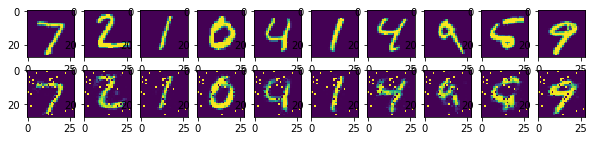

In [19]:
f, a = plt.subplots(2, 10, figsize=(10, 2))
for i in range(examples_to_show):
    a[0][i].imshow(np.reshape(mnist.test.images[i], (28, 28)))
    a[1][i].imshow(np.reshape(encode_decode[i], (28, 28)))